Loading time-series data...
Data aggregation complete.
Generating plot...


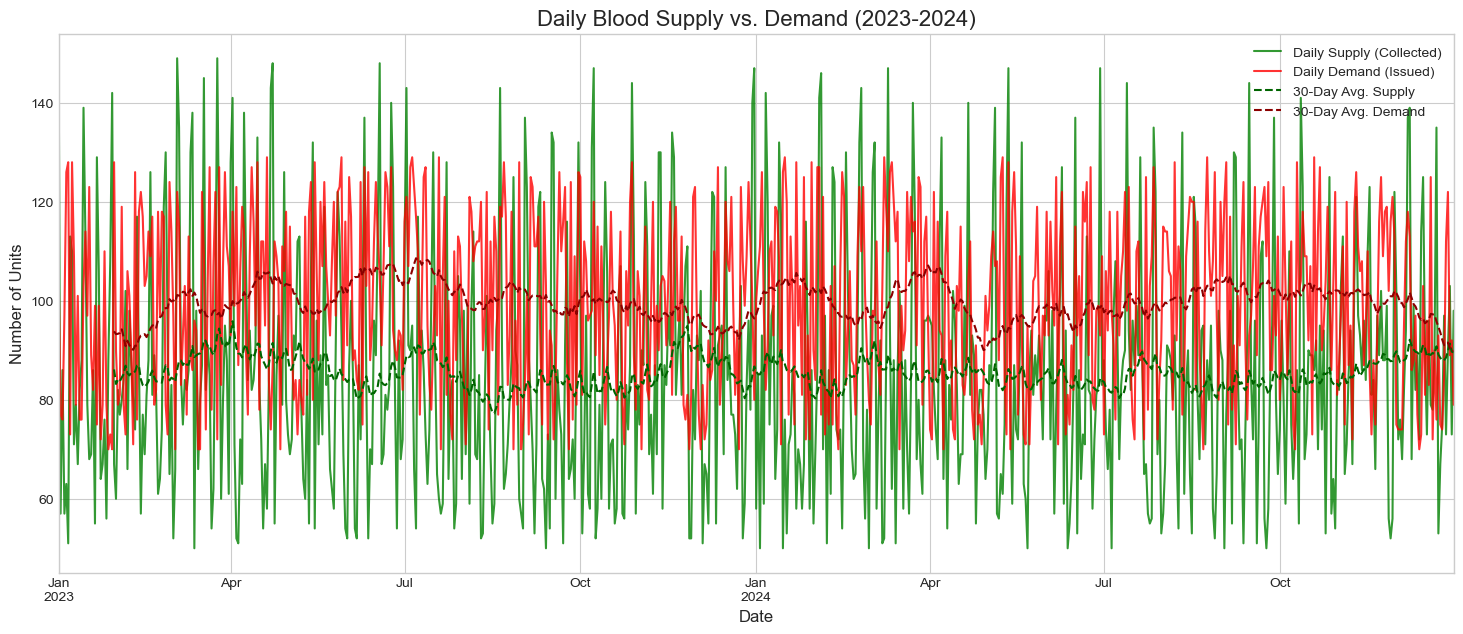

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Datasets ---
print("Loading time-series data...")
donations_df = pd.read_csv('../data/donations_log.csv')
issuance_df = pd.read_csv('../data/issuance_log.csv')

# --- Data Preparation ---
# Convert 'Date' column to datetime objects for proper time-series analysis
donations_df['Date'] = pd.to_datetime(donations_df['Date'])
issuance_df['Date'] = pd.to_datetime(issuance_df['Date'])

# Set the 'Date' column as the index
donations_df.set_index('Date', inplace=True)
issuance_df.set_index('Date', inplace=True)

# --- Aggregate to a Daily Time Series ---
# We need to know the total units per day, so we'll resample and sum.
daily_supply = donations_df['Units_Collected'].resample('D').sum()
daily_demand = issuance_df['Units_Issued'].resample('D').sum()

print("Data aggregation complete.")

# --- Visualize the Data ---
print("Generating plot...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(18, 7))

daily_supply.plot(ax=ax, label='Daily Supply (Collected)', color='green', alpha=0.8)
daily_demand.plot(ax=ax, label='Daily Demand (Issued)', color='red', alpha=0.8)

# Add a rolling average to see the trend more clearly
daily_supply.rolling(window=30).mean().plot(ax=ax, label='30-Day Avg. Supply', color='darkgreen', linestyle='--')
daily_demand.rolling(window=30).mean().plot(ax=ax, label='30-Day Avg. Demand', color='darkred', linestyle='--')


ax.set_title('Daily Blood Supply vs. Demand (2023-2024)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Units', fontsize=12)
ax.legend()
plt.show()